# Graph Application - Marvel Universe
### 02/2019 | Khanh TRUONG

In [1]:
# Import library
library(igraph)
library(ggplot2)

Warning message:
"package 'igraph' was built under R version 3.5.2"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



# 1. Creating the graph

In [2]:
# Import data
marvel_edgelist <- read.table("marvel/marvel_edgelist.txt", header = FALSE)
marvel_vertices <- read.table("marvel/marvel_vertices.txt", header = FALSE,
                       stringsAsFactors=FALSE) # this option is very important

# Create graph from data frame
marvel_net <- graph_from_edgelist(as.matrix(marvel_edgelist), directed = FALSE)
marvel_net

IGRAPH 1aa4464 U--- 19428 96662 -- 
+ edges from 1aa4464:
 [1]  1--6487  2--6488  2--6489  2--6490  2--6491  2--6492  2--6493  2--6494
 [9]  2--6495  2--6496  3--6497  3--6498  3--6499  3--6500  3--6501  3--6502
[17]  3--6503  3--6504  3--6505  4--6506  4--6507  4--6508  5--6509  5--6510
[25]  5--6511  6--6512  6--6513  6--6514  6--6515  7--6516  8--6517  8--6518
[33]  9--6519  9--6520 10--6521 10--6522 10--6523 10--6524 10--6525 10--6526
[41] 10--6527 10--6528 10--6529 10--6530 10--6531 10--6532 10--6533 10--6534
[49] 10--6535 10--6536 10--6537 10--6538 10--6539 10--6540 10--6541 10--6542
[57] 10--6543 10--6544 10--6545 10--6546 10--6547 10--6548 10--6549 10--6550
[65] 10--6551 10--6552 10--6553 10--6554 10--6555 10--6556 10--6557 10--6558
+ ... omitted several edges

In [3]:
# Add name attibutes to marvel_net
V(marvel_net)$name <- marvel_vertices$V2

In [4]:
message('Number of vertices: ', vcount(marvel_net))
message('Number of edges: ', ecount(marvel_net))

Number of vertices: 19428
Number of edges: 96662


In [5]:
message('Graph is connected? ', is_connected(marvel_net))

marvel_cc <- clusters(marvel_net)
message('Number of connected components: ', marvel_cc$no)
marvel_cc$csize # size of every connected component

Graph is connected? FALSE
Number of connected components: 23


[1] 19365     8    11     2     2     2     2     2     2     2     2     3
[13]     2     2     2     2     4     2     2     2     3     2     2

In [6]:
# Largest connected component vertices
marvel_lcc_vertices <- which(marvel_cc$membership == which.max(marvel_cc$csize)) 

# Graph of largest connected component (add edges)
marvel_lcc <- induced_subgraph(marvel_net, marvel_lcc_vertices)
marvel_lcc

IGRAPH c9ae21a UN-- 19365 96616 -- 
+ attr: name (v/c)
+ edges from c9ae21a (vertex names):
 [1] 24-HOUR MAN/EMMANUEL--AA2 35   3-D MAN/CHARLES CHAN--M/PRM 35
 [3] 3-D MAN/CHARLES CHAN--M/PRM 36 3-D MAN/CHARLES CHAN--M/PRM 37
 [5] 3-D MAN/CHARLES CHAN--WI? 9    3-D MAN/CHARLES CHAN--AVF 4   
 [7] 3-D MAN/CHARLES CHAN--AVF 5    3-D MAN/CHARLES CHAN--H2 251  
 [9] 3-D MAN/CHARLES CHAN--H2 252   3-D MAN/CHARLES CHAN--COC 1   
[11] 4-D MAN/MERCURIO    --T 208    4-D MAN/MERCURIO    --T 214   
[13] 4-D MAN/MERCURIO    --T 215    4-D MAN/MERCURIO    --T 216   
[15] 4-D MAN/MERCURIO    --T 440    4-D MAN/MERCURIO    --CM 51   
+ ... omitted several edges

# 2. Node mining

In [7]:
# Compute the node degrees
marvel_degree <- degree(marvel_net)
head(sort(marvel_degree, decreasing = TRUE),5) # Five biggest degrees characters

# The characters who have most direct links with other characters (largest degrees) are:
# Spiderman, Captain, Ironman, Thing and Thor

SPIDER-MAN/PETER PAR      CAPTAIN AMERICA IRON MAN/TONY STARK  
                1625                 1367                 1168 
THING/BENJAMIN J. GR THOR/DR. DONALD BLAK 
                 990                  965

In [8]:
# Compute the node betweenness
marvel_betweenness <- betweenness(marvel_net)
head(sort(marvel_betweenness, decreasing = TRUE),5) # Five biggest betweenness characters

# As you can see below, 4 out of 5 are among top 5 biggest degrees (only except HULK)
# So it seems that vertices have large degree GENERALLY also have large betweenness (not always),
# which is understandable in practices.

SPIDER-MAN/PETER PAR      CAPTAIN AMERICA IRON MAN/TONY STARK  
            28946999             19071647             12994794 
HULK/DR. ROBERT BRUC THOR/DR. DONALD BLAK 
            10886785             10073089

# 3. Clustering

In [9]:
# Clustering using Louvain algorithm
res_multilevel <- cluster_louvain(marvel_net)
res_multilevel # summary of clustering result

IGRAPH clustering multi level, groups: 56, mod: 0.69
+ groups:
  $`1`
  [1] "AMAZO-MAXI-WOMAN/" "DARLEGUNG, GEN."   "MANT/ERNEST"      
  [4] "MISS THING/MARY"   "PANTHER CUB/"      "STERLING"         
  [7] "SWORDSMAN IV/"     "REMNANTS"         
  
  $`2`
   [1] "ASHER, CARL"          "ASHER, DONNA"         "ASHER, MICHAEL"      
   [4] "FAGIN"                "HOFFMAN"              "LUDLUM, ROSS"        
   [7] "NILES, SEN. CATHERIN" "ORWELL"               "OSWALD"              
  [10] "BHOOD 1"              "BHOOD 2"             
  + ... omitted several groups/vertices

In [10]:
message('Number of clusters: ', max(membership(res_multilevel))) 
message('Modularity: ', round(modularity(res_multilevel), 5))

Number of clusters: 56
Modularity: 0.6879


In [11]:
# Find cluster of Wolverine/Logan
membership(res_multilevel)['WOLVERINE/LOGAN '] # first way - by name
# membership(res_multilevel)[6306] # second way - by id

# So Wolverine/Logan belongs to cluster 36

WOLVERINE/LOGAN  
              36

In [12]:
# Count number of vertices that have the same cluster as Wolverine / Logan
logan_size <- sum(membership(res_multilevel) == membership(res_multilevel)['WOLVERINE/LOGAN '])
message('Size of cluster to which Wolverine/Logan belongs is: ', logan_size)

Size of cluster to which Wolverine/Logan belongs is: 3136


In [13]:
# Extract vertices that have the same cluster number as Logan 
logan_cluster <- membership(res_multilevel)[(membership(res_multilevel) == membership(res_multilevel)['WOLVERINE/LOGAN '])]

# Extract the vertices names
logan_cluster <- names(logan_cluster)

# Extract graph from marvel_net that have names in logan_cluster
logan_net <- induced_subgraph(marvel_net, logan_cluster)

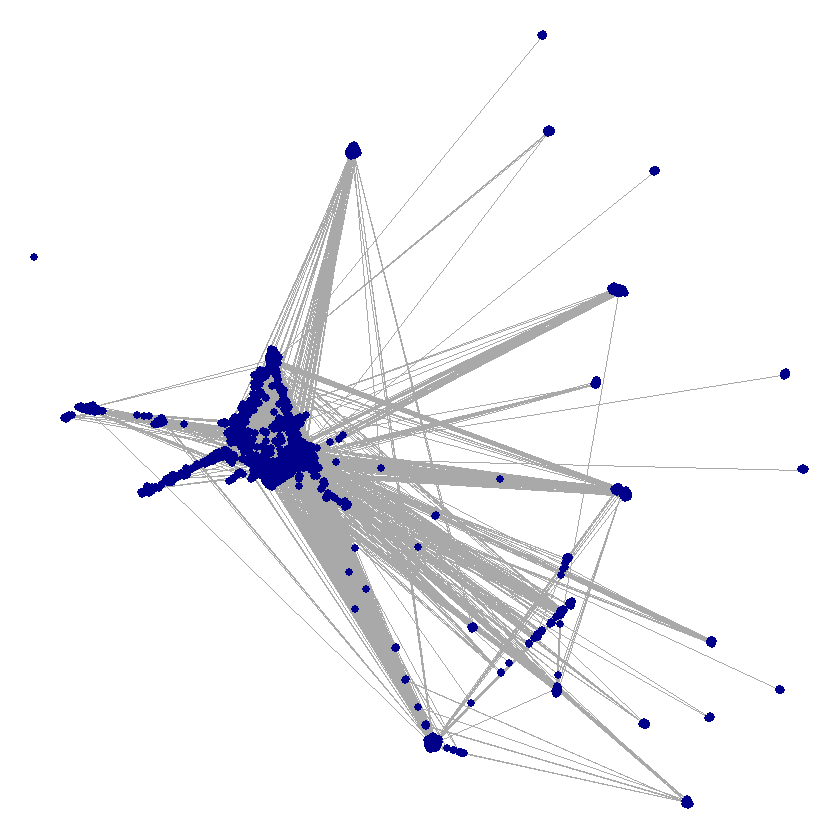

In [14]:
# Display graph of Logan
logan_net$layout <- layout_nicely(logan_net) # choose fixed default layout
par(mar = rep(0,4)) # set margin
plot(logan_net,
     vertex.size = 2,
     vertex.color = 'darkblue', # can be replaced by logan_vcol
     vertex.frame.color = 'darkblue', # can be replaced by logan_vcol
     vertex.label = NA)